# Box Plot (Kutu Grafiği)


Box Plot (Kutu Grafiği) bize tek bir şekilde 5 adet istatistiki veriyi görselleştirmemizi sağlar. Bunlar:

* ***Minumum:*** Veri seti içerisindeki en küçük değer
* ***First Quartile (ilk çeyrek):*** En küçük değer ile median'ın tam orta noktadadır. Q1
* ***Median (medyan):*** Veri setindeki orta noktadır. Önce veri seti küçükten büyüğe sıralanır. Eleman sayının tam orta noktasındaki değerdir. Bu değer aritmetik ortalama değildir.
* ***Third Quartile (üçüncü çeyrek):*** Median ile en büyük değerin tam orta noktadır. Q3
* ***Maximum:*** En büyük değer.

Bu grafik bu değerlerin grafik olarak görünmesi dışında outlier olan değerlerin tespitini daha kolay sağlar. Normal dağılımda maximum ve minumum değer ***(maximum=Q3 + 1,5*IQR , minumum=Q1-1,5*IQR)*** değerleri olarak kabul edilir ve bunun dışında kalan değerler outlier olarak kabul edilir. 

***IQR= Q1 ile Q3 arasındaki mesafe***


Box plot çizmek için <code>df.plot(kind="box")</code> parametresi kullanılır.

Örnekte kullandığımız veri setine ulaşmak için:

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import numpy as np
import pandas as pd

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Göçmen sayısın toplamını gösteren Total isimli bir kolon ekleyelim
df_can['Total'] = df_can.sum(axis=1)
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")

Box Plot örneği için Japonya'dan gelen göçmenlerin durumunu inceleyelim.

In [5]:
df_japan=df_can.loc[["Japan"],years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


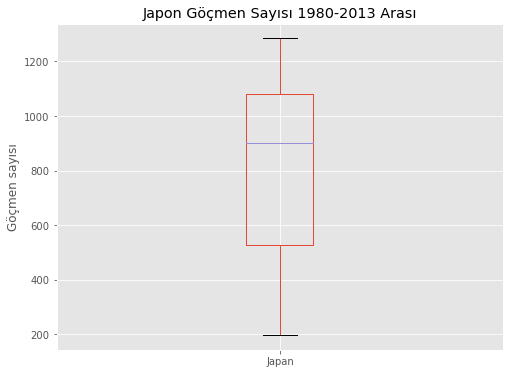

In [9]:
df_japan.plot(kind="box",figsize=(8,6))

plt.title("Japon Göçmen Sayısı 1980-2013 Arası")
plt.ylabel("Göçmen sayısı")

plt.show()

Yukarıdaki grafiği yorumlayalım.
* En düşük göçmen sayısının 200 olduğunu, en yükseğinin ~1300 olduğunu görüyoruz.
* Bu yıllar arasında, yılların %25'inde göçmen sayısının ~500'den küçük olduğunu.
* Yine bu yıllar arasında, yılların %75'inde göçmen sayısını ~1100'den küçük olduğunu 
* Yılların yarısında göçmen sayısının ~900'den büyük olduğunu 

görüyoruz.

In [10]:
# Yukarıda grafikten yorumlayarak tahmin ettiğimiz değerlerin gerçekte ne olduğunu aşağıdaki gibi görebiliriz.
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Birden fazla ülke için durumu inceleyeceğimizi bir örnek yapalım. Bunun için China ve India örneklerine bakalım.

In [11]:
df_CI=df_can.loc[["China","India"],years].transpose()

In [12]:
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


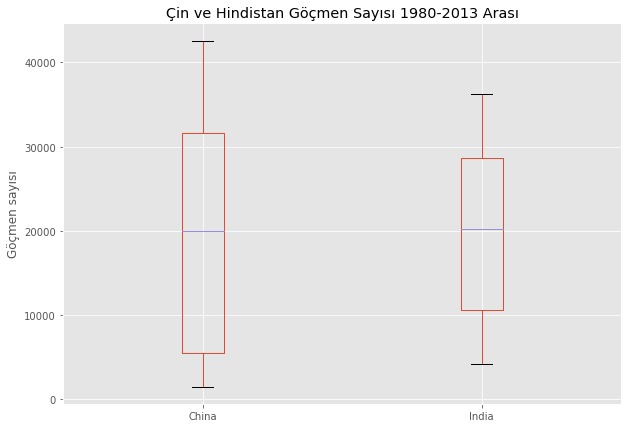

In [16]:
df_CI.plot(kind="box",figsize=(10,7))

plt.title("Çin ve Hindistan Göçmen Sayısı 1980-2013 Arası")
plt.ylabel("Göçmen sayısı")

plt.show()


China ve India için median değerleri yaklaşık olarak oaynı olmakla birlikte diğer değerlerde China daha yüksek değerler ulaşmış.

***Grafiği yatay olarak çizdirebiliriz***

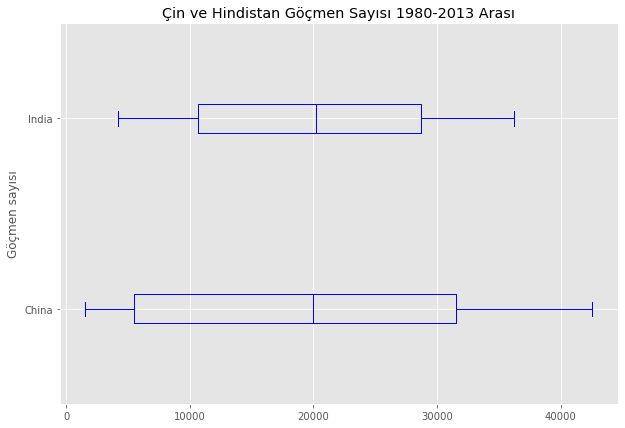

In [17]:
df_CI.plot(kind="box",figsize=(10,7),color="blue",vert=False) # Renk değiştirdim ve yatay olarak çizdim. 

plt.title("Çin ve Hindistan Göçmen Sayısı 1980-2013 Arası")
plt.ylabel("Göçmen sayısı")

plt.show()